In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
# install dependencies as necessary
%pip install -qr requirements.txt
!pip install -q roboflow
import torch
import os
from IPython.display import Image, clear_output  # to display images

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.10 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="9gT7gSFliA6Af0vZGct2")
project = rf.workspace("office-yq6ex").project("idcards-oysbj")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/IdCards-1 in yolov5pytorch:: 100%|██████████| 2310/2310 [00:00<00:00, 7437.20it/s]


In [ ]:
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 100 \
  --data {dataset.location}/data.yaml \
  --weights yolov5s.pt \
  --cache

Streaming output truncated to the last 5000 lines.
      53/99      1.98G     0.0118   0.004598          0         31        416:  37% 19/51 [00:03<00:04,  6.42it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      53/99      1.98G    0.01177   0.004601          0         38        416:  39% 20/51 [00:03<00:04,  6.70it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      53/99      1.98G    0.01171   0.004599          0         38        416:  41% 21/51 [00:03<00:04,  7.31it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      53/99      1.98G    0.01162   0

In [ ]:
%ls runs/

train/


In [ ]:

%ls runs/train/exp/weights


best.pt  last.pt


In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.35 --source {dataset.location}/test/images/

/content/yolov5
detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/IdCards-1/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/116 /content/datasets/IdCards-1/test/images/CA01_29_png.rf.036c5091ef05f03f5897c3eacda97058.jpg: 416x416 1 IDs, 7.1ms
image 2/116 /content/datasets/IdCards-1/test/images/CA04_22_png.rf.6d16cecf621131e8881844eae2508487.jpg: 416x416 1 IDs, 7.1ms
image 3/116 /content/data

Total detected images available: 116


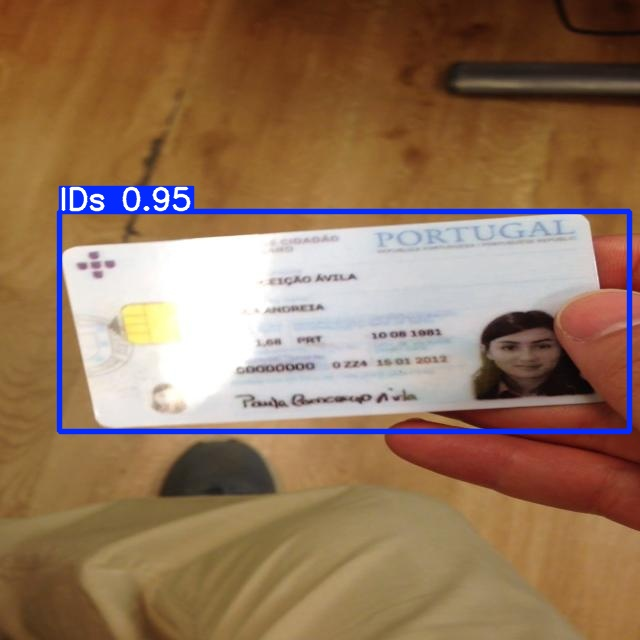

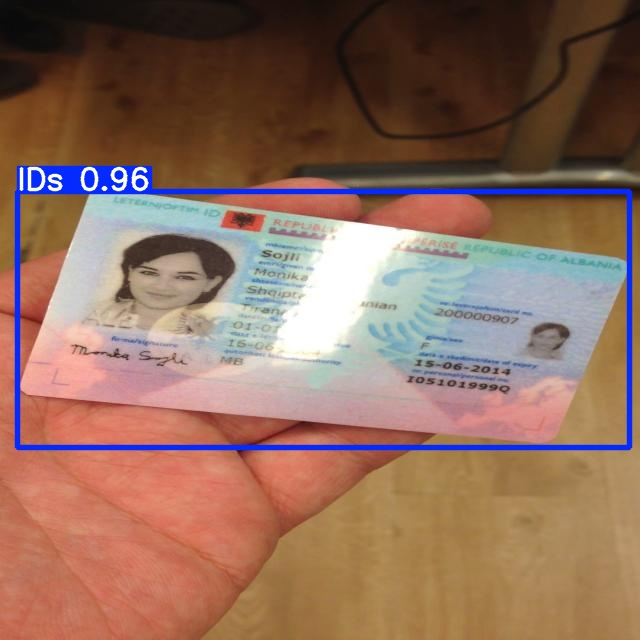

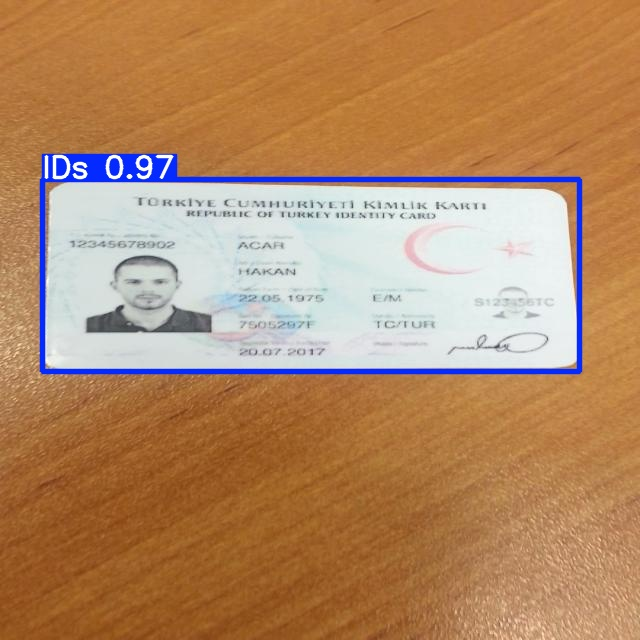

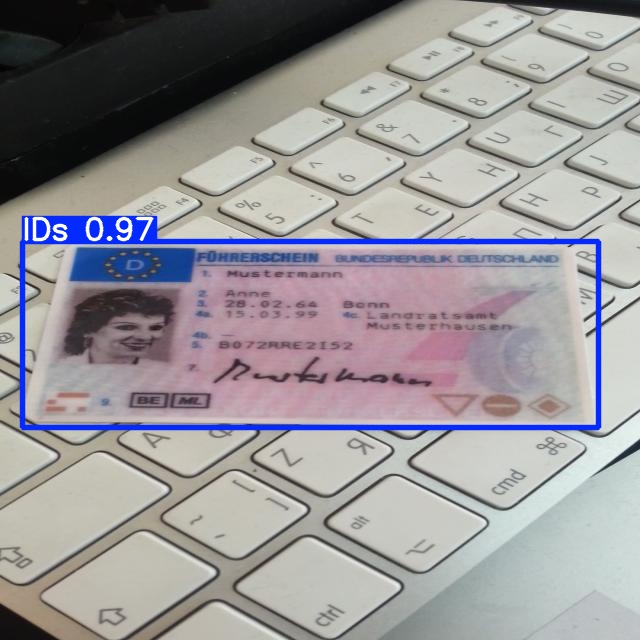

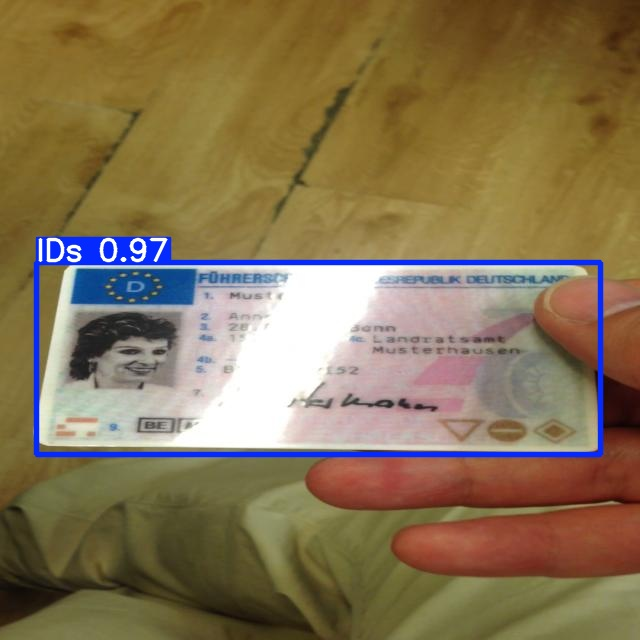

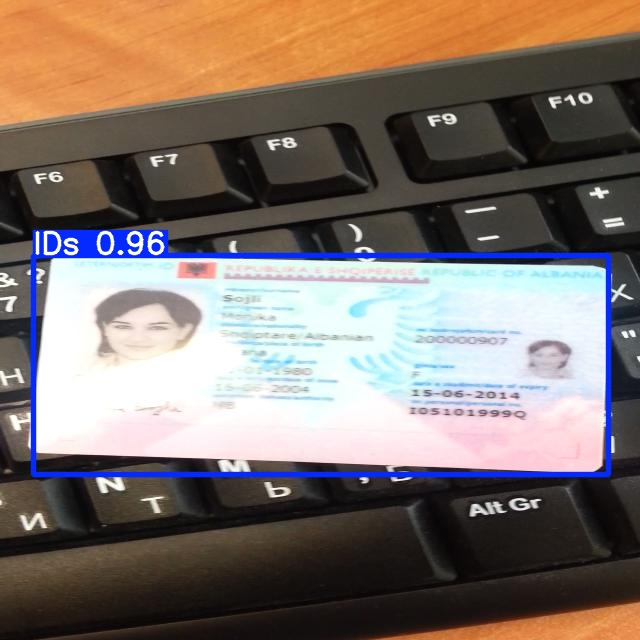

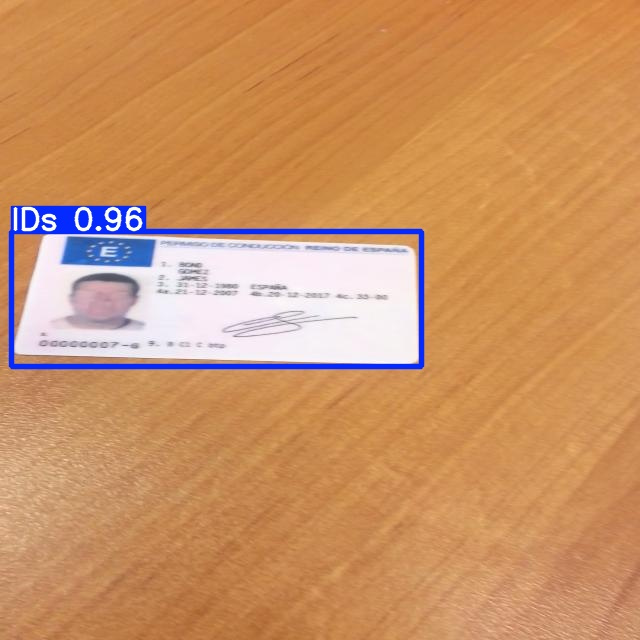

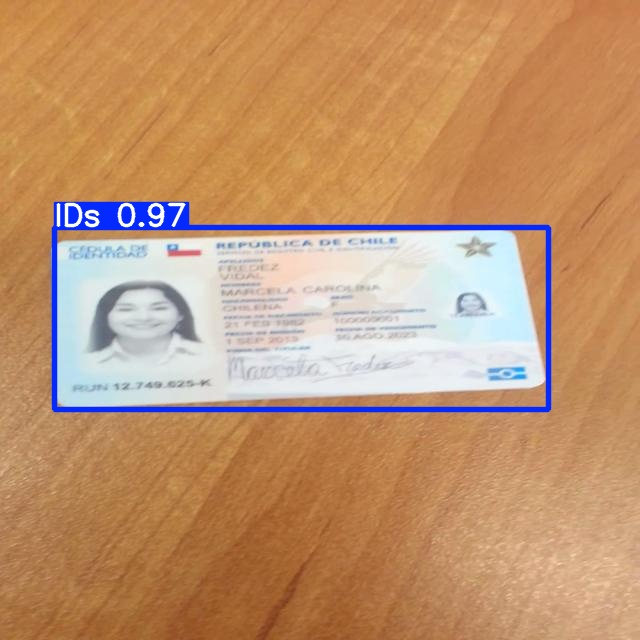

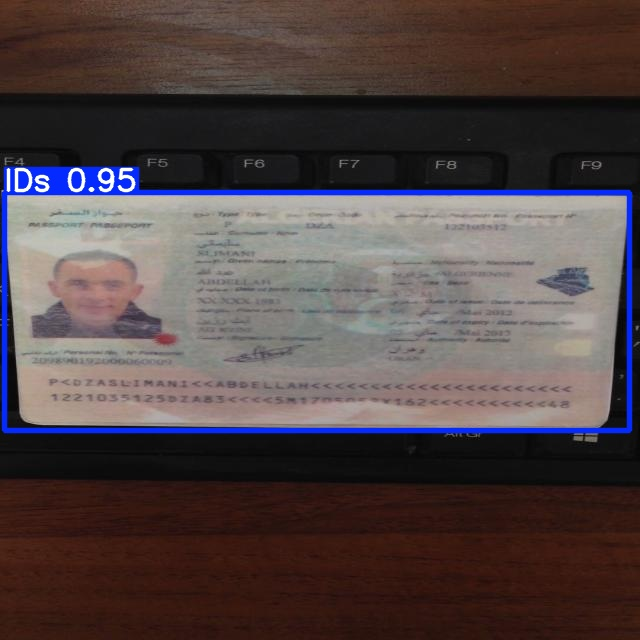

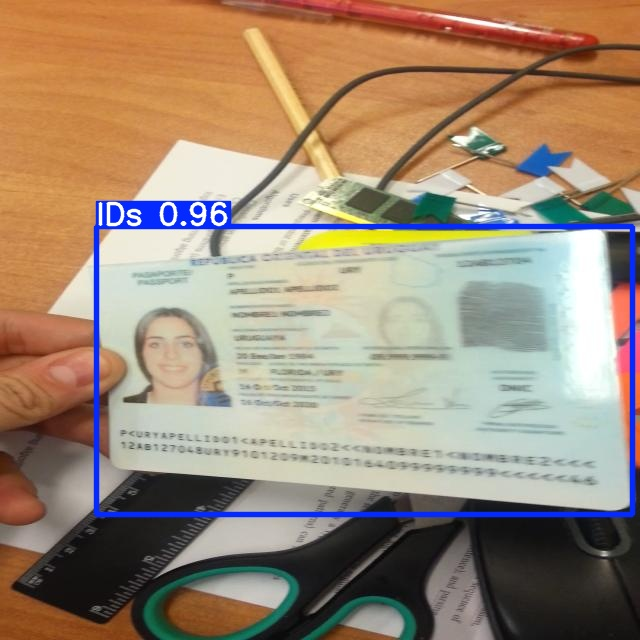

In [ ]:
import glob
import random
from IPython.display import Image, display

# Get all detected images
image_paths = glob.glob('/content/yolov5/runs/detect/exp/*.jpg')

# Print the total number of images available
total_images = len(image_paths)
print(f"Total detected images available: {total_images}")

# Select 10 random images (if there are at least 10 images)
random_images = random.sample(image_paths, min(10, total_images))

# Display the randomly selected images
for image_name in random_images:
    display(Image(filename=image_name))

In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
from pathlib import Path

# Load the checkpoint
model_path = "/content/yolov5/runs/train/exp/weights/best.pt"
checkpoint = torch.load(model_path, map_location="cpu")

# Convert all PosixPath instances to strings
def fix_paths(obj):
    if isinstance(obj, Path):
        return str(obj)
    elif isinstance(obj, dict):
        return {k: fix_paths(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [fix_paths(v) for v in obj]
    return obj

checkpoint = fix_paths(checkpoint)

# Save the fixed model
fixed_model_path = "/content/yolov5/runs/train/exp/weights/best_100epochs.pt"
torch.save(checkpoint, fixed_model_path)

print(f"Fixed model saved to: {fixed_model_path}")


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


Fixed model saved to: /content/yolov5/runs/train/exp/weights/best_100epochs.pt


In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights/best_100epochs.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python export.py --weights runs/train/exp/weights/best_100epochs.pt --include onnx

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best_100epochs.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp/weights/best_100epochs.pt with output shape (1, 25200, 6) (13.7 MB)

ONNX: starting export with onnx 1.17.0...
ONNX: export success ✅ 1.0s, saved as runs/train/exp/weights/best_100epochs.onnx (27.2 MB)

Export complete (2.3s)
Results saved to /content/yolov5/runs/train/exp/weights
Detect:          python detect.py --weights runs/train/exp/weights/best_100epochs.onnx 
Validate:   

In [ ]:
!pip install onnx_graphsurgeon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install sng4onnx

In [ ]:
!onnx2tf -i runs/train/exp/weights/best_100epochs.onnx -o best_tf

E0000 00:00:1740836957.061711    9100 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740836957.072091    9100 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

Model optimizing started ============================================================
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/onnx2tf/onnx2tf.py", line 652, in convert
    result = subprocess.check_output(
             ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 466, in check_output
    return run(*popenargs, stdout=PIPE, timeout=timeout, check=True,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model best_tf tfjs_model


2025-03-01 13:51:09.368928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740837069.402540    9597 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740837069.412338    9597 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
I0000 00:00:1740837073.824850    9597 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1740837074.001082    9597 devices.cc:67] Number of eligible GPUs (core count >= 8, co

In [ ]:
import shutil
shutil.make_archive("tfjs_model", 'zip', "tfjs_model")

from google.colab import files
files.download("tfjs_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install torch torchvision onnx onnx2tf tensorflow tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 25.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
